<a href="https://colab.research.google.com/github/MadhumitaGaneshbabu/dynamic_price_prediction/blob/main/lstm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
99/99 [==============================] - 10s 58ms/step - loss: 4065515.2500
Epoch 2/100
99/99 [==============================] - 5s 48ms/step - loss: 93125.9609
Epoch 3/100
99/99 [==============================] - 4s 39ms/step - loss: 26859.9160
Epoch 4/100
99/99 [==============================] - 5s 51ms/step - loss: 19077.8047
Epoch 5/100
99/99 [==============================] - 5s 53ms/step - loss: 14954.0762
Epoch 6/100
99/99 [==============================] - 5s 50ms/step - loss: 15586.2686
Epoch 7/100
99/99 [==============================] - 6s 63ms/step - loss: 15283.7109
Epoch 8/100
99/99 [==============================] - 5s 48ms/step - loss: 13061.7002
Epoch 9/100
99/99 [==============================] - 5s 55ms/step - loss: 10968.3711
Epoch 10/100
99/99 [==============================] - 6s 57ms/step - loss: 10404.1338
Epoch 11/100
99/99 [==============================] - 6s 56ms/step - loss: 15284.2158
Epoch 12/100
99/99 [==============================] - 6s 66m

<ipython-input-12-e6fc35e9dc51>:92: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x_pred, YPred.flatten() - dataTestTarget.values, use_line_collection=True)


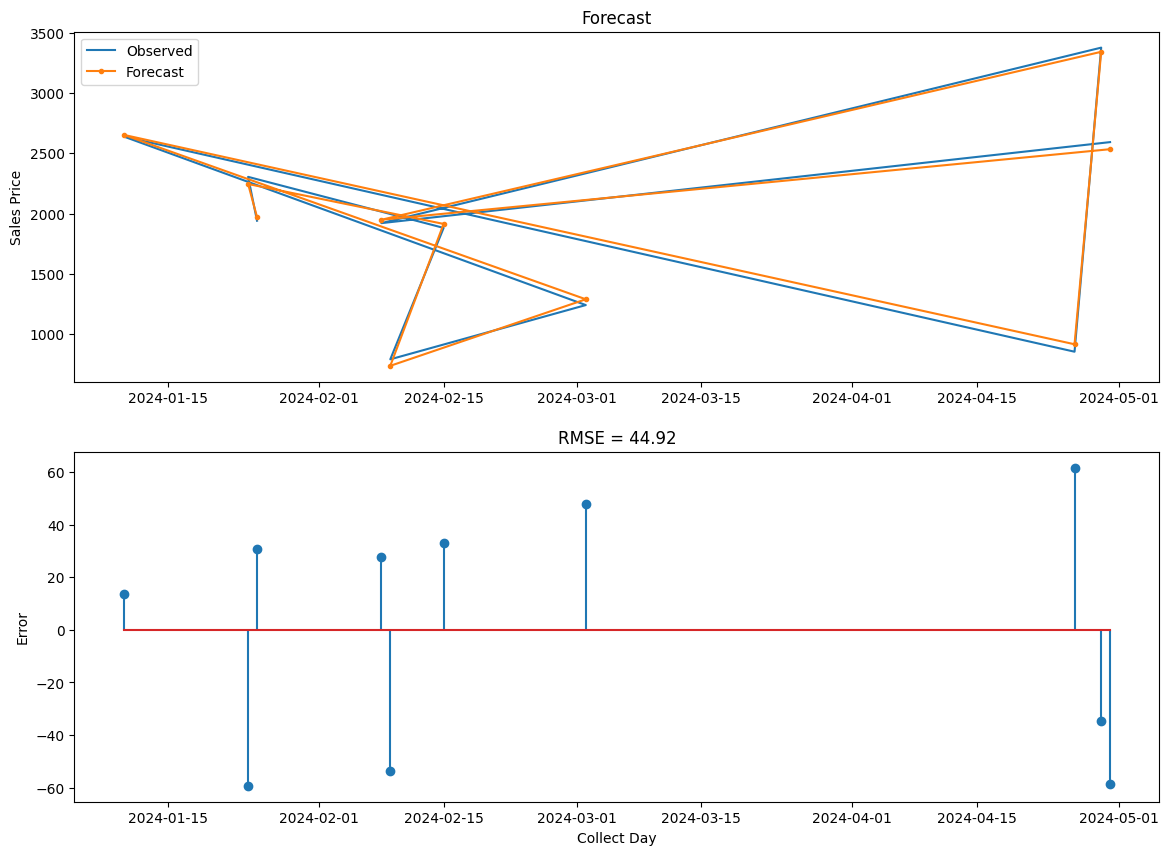

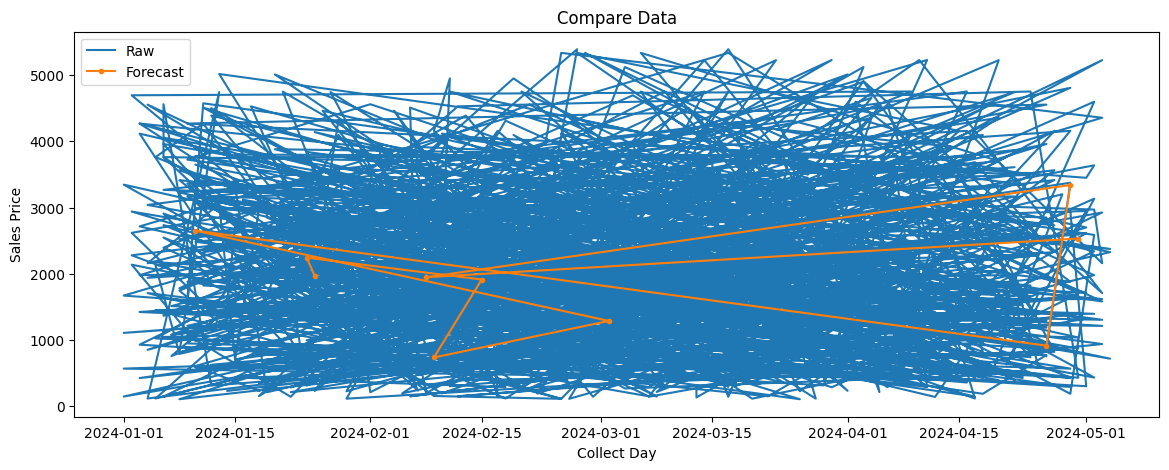

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data = pd.read_csv('oil.csv')

data['price'].fillna(method='ffill', inplace=True)
data['commission'].fillna(method='ffill', inplace=True)
data['payment_terms'].fillna(method='ffill', inplace=True)
data['payment_method'].fillna(method='ffill', inplace=True)


data['commission'] = data['commission'].str.rstrip('%').astype('float') / 100.0
data['payment_terms'] = data['payment_terms'].str.rstrip('%').astype('float') / 100.0


data['order_date'] = pd.to_datetime(data['order_date'].str.strip("'"), dayfirst=True)


features = data[['price', 'commission', 'payment_terms']]
sales_price = data['final_price']

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)


numTimeStepsTrain = 990
dataTrainFeatures = features_standardized[:numTimeStepsTrain]
dataTestFeatures = features_standardized[numTimeStepsTrain:numTimeStepsTrain+10]
dataTrainTarget = sales_price[:numTimeStepsTrain]
dataTestTarget = sales_price[numTimeStepsTrain:numTimeStepsTrain+10]


numFeatures = dataTrainFeatures.shape[1]
numHiddenUnits = 500

model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(None, numFeatures)),
    LSTM(numHiddenUnits, return_sequences=True),
    Dropout(0.2),
    LSTM(numHiddenUnits),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),

    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape data for LSTM: [samples, time steps, features]
XTrain = np.expand_dims(dataTrainFeatures, axis=1)
YTrain = np.expand_dims(dataTrainTarget, axis=1)
XTest = np.expand_dims(dataTestFeatures, axis=1)

# Train the LSTM network
model.fit(XTrain, YTrain, epochs=100, batch_size=10, verbose=1)

# Predict using the trained model
YPred = model.predict(XTest)
print(XTrain,YPred)


rmse = np.sqrt(np.mean((YPred.flatten() - dataTestTarget)**2))


x_data = data['order_date']
x_train = x_data[:numTimeStepsTrain]
x_pred = x_data[numTimeStepsTrain:]


plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(x_pred, dataTestTarget.values, label='Observed')
plt.plot(x_pred, YPred, '.-', label='Forecast')
plt.legend()
plt.ylabel("Sales Price")
plt.title("Forecast")

plt.subplot(2, 1, 2)
plt.stem(x_pred, YPred.flatten() - dataTestTarget.values, use_line_collection=True)
plt.xlabel("Collect Day")
plt.ylabel("Error")
plt.title(f"RMSE = {rmse:.2f}")
plt.show()


plt.figure(figsize=(14, 5))
plt.plot(x_data, sales_price, label='Raw')
plt.plot(x_pred, YPred, '.-', label='Forecast')
plt.xlabel("Collect Day")
plt.ylabel("Sales Price")
plt.title("Compare Data")
plt.legend()
plt.show()

In [13]:
print(YPred)

[[1971.3082 ]
 [2244.6655 ]
 [1914.0356 ]
 [ 738.14716]
 [1289.5717 ]
 [2652.1526 ]
 [ 916.7088 ]
 [3340.5117 ]
 [1948.4492 ]
 [2533.324  ]]
